[데이터 셋 링크](https://github.com/rlagksqls17/repo_dataset/tree/master/sample-dataset-for-study/%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D)

# 로지스틱 회귀모델 이론과 설명   

출처 1: ADP 실기 데이터 분석 전문가(데이터 에듀)
출처 2: 빅데이터 분석기사 실기(데이터 캠퍼스)

로지스틱 회귀분석은 종속변수가 범주형 자료일 경우 적용하는 회귀모델이다.  

범주형 자료에 선형회귀모델을 적용하면 문제가 발생하는데, 로지스틱회귀분석모델은 범주형 레이블 자료를 변형하여 비율로 적용한다.   

이렇게 자료를 변형하면 독립변수의 변화에 따라 종속변수의 발생 비율에 어떤 경향이 존재하는데 이러한 곡선을 로지스틱 회귀모델이라 한다.  

## 분석데이터 준비 

In [ ]:
 """
위스콘신 대학의 'breast-cancer-wisconsin.csv' 파일로 암예측분류를 진행해보도록 하겠습니다.  
아래와 같이 데이터를 불러와 특성치(X)와 레이블(y) 데이터셋을 나눕니다.  
"""

# 분석결과 외 다른 문장이 뜨지 않도록 하는 코드  
import warnings
warnings.filterwarnings("ignore")

import pandas as pd  
data = pd.read_csv("/content/sample_data/breast-cancer-wisconsin.csv", encoding='utf-8')

# 특성치
X = data.iloc[:, 1:10]

# 레이블
y = data[["Class"]]

In [ ]:
data.head(10)

,code,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0
5,1017122,8,10,10,8,7,10,9,7,1,1
6,1018099,1,1,1,1,2,10,3,1,1,0
7,1018561,2,1,2,1,2,1,3,1,1,0
8,1033078,2,1,1,1,2,1,1,1,5,0
9,1033078,4,2,1,1,2,1,2,1,1,0


In [ ]:
"""
train_test_split으로 train_data 셋과 test_data 셋을 분리합니다.  
기본 디폴트 7:3 비율로 나누고, y 범주의 비율에 따라 분리되도록 stratify=y 옵션을 둡니다.  
"""  

from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [ ]:
"""
MinMaxScaler를 사용하여 최소 0, 최대 1이 되도록 정규화를 합니다.  
X_train의 최소/최댓값을 기준으로 삼고 (fit), X_train과 X_test 데이터 셋을 변환 (transform) 합니다.  
"""

from sklearn.preprocessing import MinMaxScaler  

scaler = MinMaxScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

## 기본모델 적용

In [ ]:
# 우선 하이퍼파라미터 C = 1인 기본 디폴트로 분석을 해보도록 하겠습니다.  
# LogisticRegression을 불러와 model로 설정하고 훈련데이터에 fit 합니다.    
from sklearn.linear_model import LogisticRegression

logistic_reg_model = LogisticRegression()
logistic_reg_model.fit(X_scaled_train, y_train)

# 그리고 예측치를 pred_train에 저장하고 model.score로 정확도를 살펴봅니다.  
pred_train = logistic_reg_model.predict(X_scaled_train)

# X_scaled_train으로 예측한 예측치와 y_train을 비교하여 score를 냅니다.  
logistic_reg_model.score(X_scaled_train, y_train)

0.97265625

In [ ]:
# 오차행렬을 확인해봅시다.  
from sklearn.metrics import confusion_matrix

# 예측치와 실제 데이터 간의 오차 행렬을 확인합니다.
confusion_train = confusion_matrix(y_train, pred_train)

print(f"오차행렬 : \n {confusion_train}")
print("----------------------------------")
print("정상 중 5명이 오분류, 환자 중 9명이 오분류입니다.")

오차행렬 : 
 [[328   5]
 [  9 170]]
----------------------------------
정상 중 5명이 오분류, 환자 중 9명이 오분류입니다.


In [ ]:
# 정밀도와 재현율은 각각 0.97, 0.98로 좋은 수준을 나타냅니다.  
from sklearn.metrics import classification_report  

cfreport_train = classification_report(y_train, pred_train)
print(cfreport_train)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       333
           1       0.97      0.95      0.96       179

    accuracy                           0.97       512
   macro avg       0.97      0.97      0.97       512
weighted avg       0.97      0.97      0.97       512



In [ ]:
# 테스트 데이터의 예측 결과도 저장해보고 정확도를 확인해봅시다.  
pred_test = logistic_reg_model.predict(X_scaled_test)

logistic_reg_model.score(X_scaled_test, y_test)

0.9590643274853801

In [ ]:
# 마찬가지로 테스트 데이터에서 로지스틱회귀모형을 적용했을 때 오차행렬을 확인해봅시다.  
confusion_test = confusion_matrix(y_test, pred_test)
confusion_test

array([[106,   5],
       [  2,  58]])

In [ ]:
# 테스트 데이터 셋의 평가지표도 확인해봅시다.  
from sklearn.metrics import classification_report 

logistic_test_CR = classification_report(y_test, pred_test)
print(logistic_test_CR)

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       111
           1       0.92      0.97      0.94        60

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



## Grid Search  

In [ ]:
"""
이번엔 하이퍼파라미터인 C값을 조정하면서 좀 더 좋은 예측 모델을 탐색해보도록 하겠습니다.  
다만 기본모델의 정확도가 워낙 높아 모델 개선의 여지는 많지 않을 것 같습니다.  
아래와 같이 C를 0.001, 0.01, 0.1, 1, 10, 100 등 6개로 설정하고 그리드 탐색을 진행합니다.
"""
from sklearn.model_selection import GridSearchCV

param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_scaled_train, y_train)

print(f"Best Parameter : {grid_search.best_params_}")
print(f"Best Score : {grid_search.best_score_}")
print(f"TestSet Score : {grid_search.score(X_scaled_test, y_test)}")

Best Parameter : {'C': 10}
Best Score : 0.972606129830573
TestSet Score : 0.9590643274853801


## Random Search  

In [ ]:
"""
랜덤 탐색은 분석자가 하이퍼파라미터의 범위를 지정하고 그 안에서 무작위로 뽑아 수행하는 것입니다.  
따라서 분석할 때마다 다른 결과가 나타날 수 있습니다.  
"""  

from scipy.stats import randint  
param_distribs = {'C' : randint(low=0.001, high=100)}

from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(LogisticRegression(), 
                                   param_distributions=param_distribs, n_iter=100, cv=5)
random_search.fit(X_scaled_train, y_train)

print(f"Best Parameter: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")
print(f"TestSet Score: {random_search.score(X_scaled_test, y_test)}")

Best Parameter: {'C': 11}
Best Score: 0.9745478774033887
TestSet Score: 0.9590643274853801


# 로지스틱 회귀모델 개인 데이터 분석

In [ ]:
import pandas as pd  
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# 데이터 불러오기
credit = pd.read_csv("/content/sample_data/credit_final.csv", encoding='utf-8')

# 데이터 칼럼 설정 : 변수 선택 [1, 2, 3, 4, 6, 8, 9, 10, 12, 13, 14, 15, 20]
X = credit.iloc[:, 1:]
y = credit['credit.rating']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# 데이터 정규화
scaler = MinMaxScaler()  
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

# 로지스틱 모델 적용 
LR_model = LogisticRegression()
LR_model.fit(scaled_X_train, y_train)

pred_train = LR_model.predict(scaled_X_train)
pred_test = LR_model.predict(scaled_X_test)


"""
정확도 분석
# LR_model.score(scaled_X_train, y_train) # 0.776 (컬럼 제거 후 0.774)
# LR_model.score(scaled_X_test, y_test) # 0.78 (컬럼 제거 후 0.768)
"""  

"""
혼동행렬 분석  
# confusion_train = confusion_matrix(y_train, pred_train)
array([[105, 120],
       [ 48, 477]])
# confusion_test = confusion_matrix(y_test, pred_test)
array([[ 38,  37],
       [ 18, 157]])
"""

from sklearn.metrics import classification_report  

cfreport_train = classification_report(y_train, pred_train)

# 정확도 외에 정밀도(precision), 재현율(recall), f1-score 등이 제시된다.
print("분류예측 레포트 : \n", cfreport_train)

분류예측 레포트 : 
               precision    recall  f1-score   support

           0       0.69      0.47      0.56       225
           1       0.80      0.91      0.85       525

    accuracy                           0.78       750
   macro avg       0.74      0.69      0.70       750
weighted avg       0.77      0.78      0.76       750



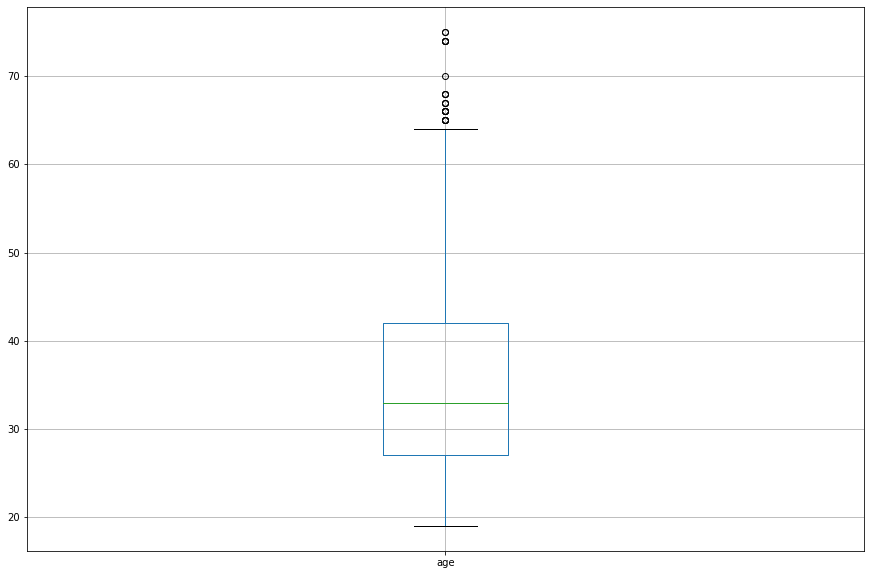

In [ ]:
credit.boxplot(column='age')